# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo III - Aquisição e Transformação de Dados</span>


## <span style="color:darkred">Avaliação - com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---
#### <font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>

---

Antes de iniciar, acesse o portal : https://dados.educacao.sp.gov.br/dataset/fluxo-escolar-por-escola

Procure pelo arquivo CSV relativo a "Fluxo Escolar 2019 - por escola", arquivo `FLUXO_ESCOLAR_ESCOLA.csv`

O fluxo escolar é medido pela taxa média de aprovação em cada etapa da escolarização, sendo elas as séries iniciais e séries finais do Ensino Fundamental e Ensino Médio, coletadas pelo Censo Escolar.

Para saber mais sobre o funcionamento do Fluxo Escolar, visite a página https://dados.educacao.sp.gov.br/story/fluxo

Carregue os dados. As colunas possuem significado de acordo com o "dicionário de dados" disponível ao visualizar o arquivo no referido site. As colunas são rotuladas da seguinte forma:
- Ano: para o qual foi realizado o cálculo do fluxo
- CD_DIRETORIA: Código da diretoria de ensino
- NM_DIRETORIA: Nome da diretoria de ensino
- NM_MUNICIPIO: Nome do Município
- CD_REDE_ENSINO: Código da Rede de Ensino (1:Estadual)
- CD_ESCOLA: Código da Escola
- NM_COMPLETO_ESCOLA: Nome Completo da Escola
- CD_TP_IDENTIFICADOR: Código do Tipo de Escola
- APR_1: Porcentagem de Alunos Aprovados no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- REP_1: Porcentagem de Alunos Reprovados no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- ABA_1: Porcentagem de Alunos com Abandono no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- REP_2: Porcentagem de Alunos Reprovados no Ensino Fundamental - Anos Finais no ensino fundamental de 9 anos
- ABA_2: Porcentagem de Alunos com Abando no Ensino Fundamental - Anos Finais no ensino fundamental de 9 anos
- APR_3: Porcentagem de Alunos Aprovados no Ensino Médio
- REP_3: Porcentagem de Alunos Reprovados no Ensino Médio
- ABA_3: Porcentagem de Alunos com Abandono no Ensino Médio

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# carregando dados
dc = pd.read_csv("./dados/FLUXO_ESCOLAR_ESCOLA.csv", sep=',')
ncols = dc.shape[1]
ncols = dc.shape[1]
print("atributos: ", ncols)
print("linhas: ", dc.shape[0])

atributos:  16
linhas:  5220


### Questão 1)
 
Considere os seguintes problemas e a natureza dos seus respectivos dados:

I - Uma sequência de dados de um sensor de temperatura, com valores em Celsius coletados e armazenados a cada 2 horas. Utilizando o histórico de 1 ano de observações anteriores até o dia atual, se intenciona predizer a temperatura nas próximas 24 horas.<br>
II - Uma base de dados contendo informações sobre livros (gênero, número de páginas, autor, ano de lançamento, país de origem, entre outros) e as avaliações desses livros (nota de 1 a 5) obtidos junto a leitores do fã clube de Harry Potter de Minas Gerais, com a qual se intenciona predizer qual seria a nota de um livro sendo considerado para publicação por uma editora, permitindo predizer o potencial desse novo livro para o público brasileiro.<br>
III - Numa base de dados de um e-commerce contendo informações sobre clientes e seus padrões de compras, foi feita uma segmentação manual de milhares de clientes em 5 categorias. Deseja-se treinar modelos para aprender a classificar novos clientes em uma dessas categorias.<br>

Podemos utilizar métodos que assumam dados do tipo i.i.d. (independente e identicamente distribuídos) e garantir que esses métodos irão obter conclusões válidas em quais dos casos?

<font color='red'>(a) III</font><br>
(b) I e III<br>
(c) I<br>
(d) II<br>

<font color='red'>Resposta</font>: *O caso I é de natureza sequencial e temporal, sendo que cada temperatura tomada possui relação com a anterior, sendo não i.i.d. O caso II possui viés de seleção se considerarmos que a intenção é predizer para um público mais amplo do que a origem dos dados obtidos permite. Já o caso III é i.i.d. pois não há dependência entre os dados e a amostragem é adequada para o problema em questão.*

### Questão 2)
 
Compute a média das variáveis ABA_1, ABA_2 e ABA_3 e adicione essa média como um novo atributo ABA_MED à base de dados. Substitua por nulo (`nan`) os valores onde 'ABA_MED' seja igual a 0. Realize a **discretização** da variável 'ABA_MED' utilizando:
1. o método dos quantis, utilizando 7 intervalos alvo
2. o método dos intervalos, utilizando os seguintes intervalos alvo: (0, 1] (1, 5] (5, 10] (10, 25] (25, 50] (50, max(ABA_MED)],
em que max(ABA_MED) é o maior valor desse atributo

Use o método qcut() para o item 1 e cut() para o item 2

Adicione essas novas variáveis na base, com os nomes 'ABA_Q' (quantis) e 'ABA_I' (intervalos)

Qual é a quantidade de dados (frequências dos valores discretizados) na base após a discretização, relativos ao primeiro intervalo (com os menores valores) e ao último intervalo (com os maiores valores) para, respectivamente, ABA_Q e ABA_I?

(a) ABA_Q: primeiro -0.004, último 423. ABA_I: primeiro 1, último 431<br>
(b) ABA_Q: primeiro 423, último 431. ABA_I: primeiro 1612, último 4<br>
(c) ABA_Q: primeiro 431, último 3099. ABA_I: primeiro 1612, último 0<br>
<font color='red'>(d) ABA_Q: primeiro 431, último 423. ABA_I: primeiro 1612, último 1
.<br></font>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [2]:
atts = ['ABA_1', 'ABA_2', 'ABA_3']
print(atts)
dc['ABA_MED'] = dc[atts].mean(axis=1)

['ABA_1', 'ABA_2', 'ABA_3']


<AxesSubplot:>

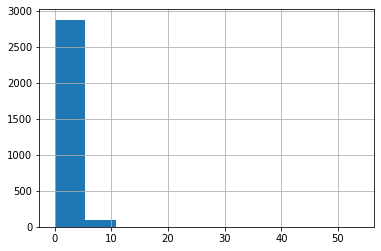

In [3]:
dc.loc[dc['ABA_MED']==0,'ABA_MED'] = np.nan
dc['ABA_MED'].hist()

In [4]:
dc['ABA_MED'].describe()

count    2966.000000
mean        1.412117
std         1.833886
min        -0.003333
25%         0.263333
50%         0.820000
75%         1.979167
max        53.716667
Name: ABA_MED, dtype: float64

In [5]:
tot_q =  pd.qcut(dc['ABA_MED'], 7)
dc['ABA_Q'] = tot_q
dc['ABA_Q'].value_counts()

(-0.0043300000000000005, 0.143]    431
(0.617, 1.09]                      431
(1.766, 2.91]                      425
(0.314, 0.617]                     424
(2.91, 53.717]                     423
(0.143, 0.314]                     417
(1.09, 1.766]                      415
Name: ABA_Q, dtype: int64

In [6]:
intervs = [0, 1, 2.5, 5, 10, 25, 50, dc['ABA_MED'].max()]
tot_i =  pd.cut(dc['ABA_MED'], intervs)
dc['ABA_I'] = tot_i
dc['ABA_I'].value_counts().sort_values()

(25.0, 50.0]         0
(50.0, 53.717]       1
(10.0, 25.0]         3
(5.0, 10.0]        113
(2.5, 5.0]         434
(1.0, 2.5]         792
(0.0, 1.0]        1612
Name: ABA_I, dtype: int64

### Questão 3)

Normalize 2 variáveis da base: ABA_MED e APR_3
* APR_3 utilizando normalização min-max com mínimo 0 e máximo 1
* ABA_MED utilizando normalização robusta

Para isso, codifique funções que recebam uma coluna por parâmetro e retornem um atributo já normalizado

Depois, aplique as funções e crie novas variáveis com os atributos normalizados: APR_3_01 e ABA_MED_nr.

Após a normalização, quais os valores de média, desvio padrão, mínimo e máximo dessas novas variáveis, arredondando para 1 casa decimal?

(a) APR_3_01: 0.0, 1.0, 0.0, 1.0; ABA_MED_nr: 0.3, 1.1, -0.5, 30.8<br>
(b) APR_3_01: 0.7, 0.4, 0.0, 1.0; ABA_MED_nr: 0.3, 0.7, -1.0, 53.8<br>
(c) APR_3_01: 0.0, 1.0, 0.0, 1.0; ABA_MED_nr: 0.3, 0.7, -1.0, 53.8<br>
<font color='red'>(d) APR_3_01: 0.7, 0.4, 0.0, 1.0; ABA_MED_nr: 0.3, 1.1, -0.5, 30.8<br></font>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [7]:
def norm_robusta(att):
    # computa média e desvio padrao
    var_med = att.median()
    q25 = att.quantile(0.25)
    q75 = att.quantile(0.75)

    # computa normalizacao
    var_norm = (att - var_med) / (q75-q25)
    return var_norm

def norm_minmax(att, a=0, b=1):
    # computa minimo e maximo
    var_min = att.min()
    var_max = att.max()

    # computa normalizacao
    att_norm = a+( ((att - var_min)*(b-a)) / (var_max-var_min) )
    return att_norm

In [8]:
# INICIAIS_n,  FINAIS_n, MEDIO_n
dc['ABA_MED_nr'] = norm_robusta(dc['ABA_MED'] )
dc['APR_3_01'] = norm_minmax(dc['APR_3'],a=0,b=1)

In [9]:
np.round(dc[['ABA_MED_nr', 'APR_3_01']].describe(),1)

,ABA_MED_nr,APR_3_01
count,2966.0,5220.0
mean,0.3,0.7
std,1.1,0.4
min,-0.5,0.0
25%,-0.3,0.0
50%,0.0,0.9
75%,0.7,1.0
max,30.8,1.0


### Questão 4)
 
Transforme os atributos 'ABA_2' e 'ABA_MED' por meio da função da raiz quadrada. Para isso:
1. Faça uma cópia da base de dados, e nessa cópia remova todas as linhas cujos atributos possuem valor 0 ou Nulos (`NaN`) em 'ABA_2' ou 'ABA_MED'
2. Considerando os atributos 'ABA_2' e 'ABA_MED' transforme-os esses utilizando a operação da raiz quadrada no seguinte formato. Seja $x$ o atributo original, obtemos a sua versão transformada:
$$x' = \sqrt{x+1}$$
e os adicione à base de dados com novos nomes, ex. 'sqrtABA_2' e  'sqrtABA_MED',
3. Calcule a correlação entre os atributos após a transformação do passo 2 (utilize o método `.corr()`)

Qual o valor obtido da correlação entre essas novas variáveis ('sqrtABA_2' e 'sqrtABA_MED') ao arredondar para 2 casas decimais?

(a) 0.85<br>
<font color='red'>(b) 0.81<br></font>
(c) 0.77<br>
(d) 1.00<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [10]:
dc2 = dc.copy()

In [11]:
dc2 = dc2.drop(dc2[dc2['ABA_2'] == 0].index)
dc2 = dc2.drop(dc2[dc2['ABA_MED'] == 0].index)
dc2 = dc2.dropna(subset=['ABA_2','ABA_MED'])
print(dc2.shape)

(2034, 21)


In [12]:
# vamos adicionar essas novas variaveis a base
dc2['ABA_2_S'] = np.sqrt(np.array(dc2['ABA_2'])+1)
dc2['ABA_MED_S'] = np.sqrt(np.array(dc2['ABA_MED'])+1)

In [13]:
np.round(dc2[['ABA_2','ABA_MED', 'ABA_2_S','ABA_MED_S']].corr(),2)

,ABA_2,ABA_MED,ABA_2_S,ABA_MED_S
ABA_2,1.00,0.84,0.96,0.78
ABA_MED,0.84,1.00,0.77,0.94
ABA_2_S,0.96,0.77,1.00,0.81
ABA_MED_S,0.78,0.94,0.81,1.00


### Questão 5)
 
Utilize a base de dados antes da modificação feita na Questão 4. Codifique a variável categórica 'ABA_Q' para o tipo categórica ordinal e 'NM_MUNICIPIO:' para categórica nominal:
* Para ABA_Q use números inteiros sequenciais, iniciados por 0, para codificar a variável na ordem dos valores dos intervalos e gere um novo atributo ABA_Q_cod. 
* Para NM_MUNICIPIO use números inteiros sequenciais, iniciados por 0 para codificar a variável em ordem alfabética, e gere um novo atributo NM_MUN_cod. 

Observação: aqui a intenção é que o atributo codificação tenha relação com a ordem alfabética do município. Se a intenção fosse a de posteriormente aplicar métodos que realizam comparação por distância independente da ordem alfabética, a codificação ideal seria one-hot-encoding/dummy variables.

Use a função `value_counts()` para mostrar a frequência dos códigos de ABA_Q_cod e NM_MUN_cod. Responda abaixo quais **valores discretos** (após codificação realizada) possuem a maior frequência (maior contagem):

(a) NM_MUN_cod: código 1124;  ABA_Q_cod: códigos 0 e 2<br>
(b) NM_MUN_cod: código 563;  ABA_Q_cod: código 0 e 1<br>
(c) NM_MUN_cod: código 1124;  ABA_Q_cod: códigos 0 e 1<br>
<font color='red'>(d) NM_MUN_cod: código 563;  ABA_Q_cod: códigos 0 e 3<br></font>

<font color='red'>Resposta</font>: *ver codigo abaixo*


In [14]:
cats_t = dc['ABA_Q'].unique().sort_values()
num_t = np.arange(cats_t.shape[0])

map_t = dict(zip(cats_t, num_t))
print(map_t)

{Interval(-0.0043300000000000005, 0.143, closed='right'): 0, Interval(0.143, 0.314, closed='right'): 1, Interval(0.314, 0.617, closed='right'): 2, Interval(0.617, 1.09, closed='right'): 3, Interval(1.09, 1.766, closed='right'): 4, Interval(1.766, 2.91, closed='right'): 5, Interval(2.91, 53.717, closed='right'): 6, nan: 7}


In [15]:
dc['NM_MUN_cod'] = dc['NM_MUNICIPIO'].astype("category").cat.codes
dc['ABA_Q_cod'] = dc['ABA_Q'].map(map_t)

In [16]:
dc['ABA_Q_cod'].value_counts().sort_values()

4    415
1    417
6    423
2    424
5    425
0    431
3    431
Name: ABA_Q_cod, dtype: int64

In [17]:
dc['NM_MUN_cod'].value_counts().sort_values()

643       1
228       1
271       1
232       1
240       1
       ... 
582      82
535      89
108     165
214     170
563    1116
Name: NM_MUN_cod, Length: 644, dtype: int64